In [1]:
from food_images_finetuning.loaders.load_dataset import load_dataset
from food_images_finetuning.schemas.dataset import Dataset
from food_images_finetuning.loaders.load_model import load_vl_model

import io

import matplotlib.pyplot as plt
from PIL import Image


In [2]:
config = Dataset.load()
print(config.dataset_id)
dataset = load_dataset(
    name="ethz/food101",
    split=config.split,
    n_samples=None,
    seed=config.seed,
)

2025-11-03 19:37:18.457 | INFO     | food_images_finetuning.loaders.load_dataset:load_dataset:22 - Loading dataset 'ethz/food101' with split 'train'


ethz/food101


2025-11-03 19:37:20.754 | INFO     | food_images_finetuning.loaders.load_dataset:load_dataset:30 - Dataset loaded with 75750 samples.


In [3]:
label_names = dataset.features["label"].names
label_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [4]:
df = dataset.to_pandas()

In [5]:
df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,74
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,71
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,73
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,16
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,63


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75750 entries, 0 to 75749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   75750 non-null  object
 1   label   75750 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [7]:
df["label"] = df["label"].apply(lambda x: label_names[x])

print(df.head())

                                               image        label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  peking_duck
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       paella
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  panna_cotta
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   cheesecake
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     macarons


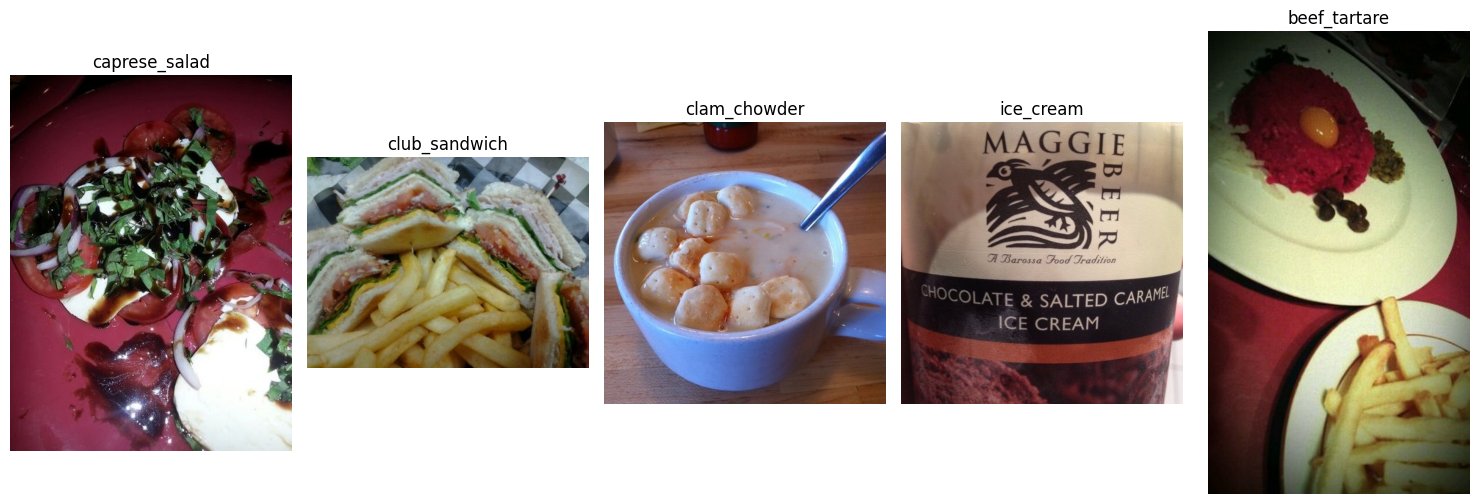

In [10]:
n = 5

sample_df = df.sample(n)


plt.figure(figsize=(15, 5))
for i, row in enumerate(sample_df.itertuples(), 1):
    # Extract raw bytes
    img_bytes = row.image["bytes"]

    # Convert bytes to image
    img = Image.open(io.BytesIO(img_bytes))

    # Display
    plt.subplot(1, n, i)
    plt.imshow(img)
    plt.title(row.label)
    plt.axis("off")

plt.tight_layout()
plt.show()

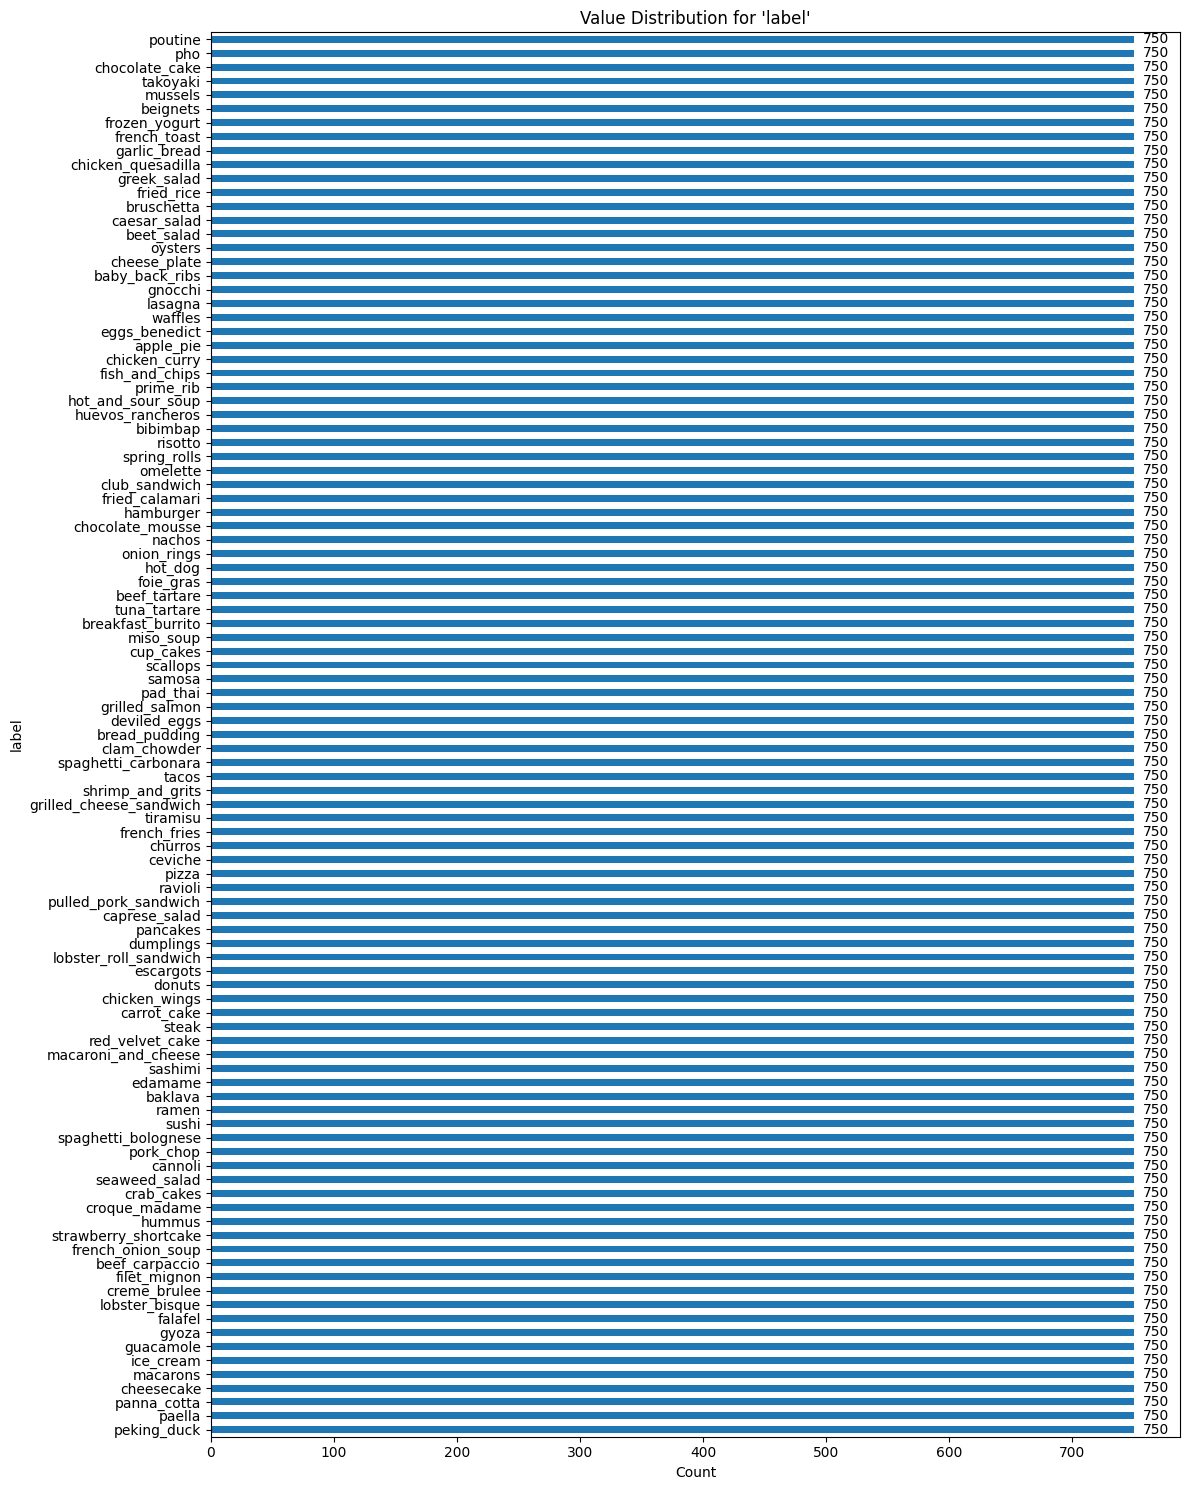

In [12]:


selected_columns = ["label"]

# Loop through each column and plot value distribution (horizontal)
for col in selected_columns:
    plt.figure(figsize=(12, 15))

    value_counts = df[col].value_counts()
    ax = value_counts.plot(kind="barh")

    # Add the numbers next to each bar
    for i, (value, count) in enumerate(value_counts.items()):
        ax.text(
            count + (max(value_counts) * 0.01),  # small offset to the right
            i,
            str(count),
            va="center",
            fontsize=10,
        )

    plt.title(f"Value Distribution for '{col}'")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [13]:

model, processor = load_vl_model(model_id="LiquidAI/LFM2-VL-450M")

2025-11-03 19:38:49.817 | INFO     | food_images_finetuning.loaders.load_model:load_vl_model:37 - Model and processor loaded from LiquidAI/LFM2-VL-450M


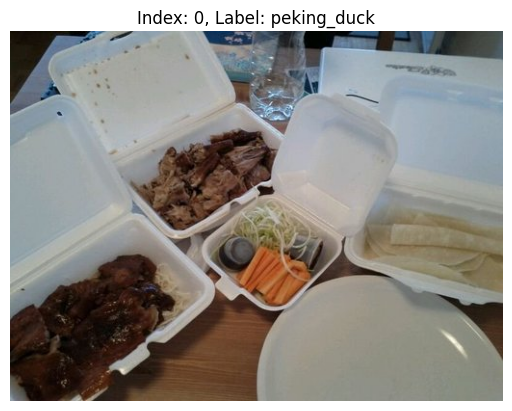

Reply: user
What is in this image?
assistant
This image shows a variety of food items arranged on a wooden table. There are four open white styrofoam containers, each holding different dishes:

1. The first container has meat, possibly pork or beef, with a brown sauce.

2. The second container contains shredded vegetables, including carrots and possibly cabbage.

3. The third container holds a white plate.

4. The fourth container has a white tortilla or flatbread.

In addition to the containers, there are other items visible:

- A clear glass of water
- A bottle of water
- A blue and white patterned object, possibly a napkin or placemat

The food appears to be a mix of meats, vegetables, and possibly some rice or noodles. The overall presentation suggests this could be a meal or snack setup, with a variety of options available for different tastes and preferences.


In [15]:
def get_image_by_index(index, df):
    """
    Retrieve image and sample (row) from a pandas DataFrame by index.
    """
    if index not in df.index:
        raise ValueError(f"Index {index} not found in DataFrame.")

    row = df.loc[index]
    img_bytes = row["image"]["bytes"]

    # Decode the image bytes
    image = Image.open(io.BytesIO(img_bytes))

    return image, row


# Example usage:
image_id = 0  # Use your DataFrame index here
image, sample = get_image_by_index(image_id, df)

# Plot the image
plt.imshow(image)
plt.axis("off")
plt.title(f"Index: {image_id}, Label: {sample['label']}")
plt.show()


conversation = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": "What is in this image?"},
        ],
    },
]

# Generate Answer
inputs = processor.apply_chat_template(
    conversation,
    add_generation_prompt=True,
    return_tensors="pt",
    return_dict=True,
    tokenize=True,
).to(model.device)
outputs = model.generate(**inputs, max_new_tokens=200)
# print("Outputs:", outputs)
reply = processor.batch_decode(outputs, skip_special_tokens=True)[0]
breakpoint()
print("Reply:", reply)